In [44]:
import mne
import os
import numpy as np
import pandas as pd
from scipy.io import savemat, loadmat

In [6]:
raw = mne.io.read_raw_edf("chb01_03.edf")

Extracting EDF parameters from c:\Users\202211049\Desktop\python_test\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\202211049\AppData\Local\Temp\ipykernel_3932\2494023694.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("chb01_03.edf")


In [29]:
sfreq = int(raw.info['sfreq'])

In [13]:
channels = raw.to_data_frame(picks='eeg', index='time')

In [37]:
window = 60 * sfreq
slide = 1 * sfreq

In [34]:
DFC = np.empty((3541, 23, 23))

In [39]:
for t, i in enumerate(range(0, len(channels) - window + slide, slide)):
    DFC[t] = channels.iloc[i: i + window].corr()

In [41]:
DFC[0].shape

(23, 23)

In [45]:
savemat("pearson.mat", {'data':DFC})

RuntimeError: Requested MovieWriter (ffmpeg) not available

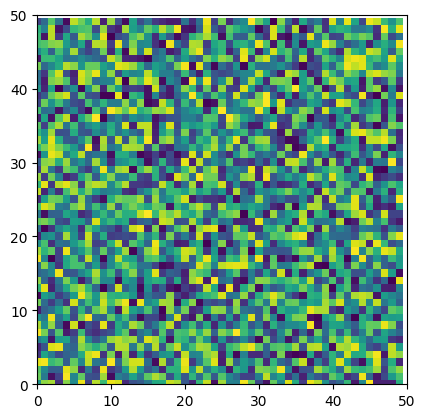

In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = np.random.rand(100,50,50)

fig, ax = plt.subplots()

ax.set_xlim((0, 50))
ax.set_ylim((0, 50))

im = ax.imshow(data[0,:,:])

def init():
    im.set_data(data[0,:,:])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = data[i,:,:]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200)

HTML(anim.to_html5_video())